## Import Packages

In [1]:
import pandas as pd
import numpy as np
import os
import pandas_datareader as pdr
import datetime
import requests
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly
import cufflinks as cf
import pandas_ta as ta
from tiingo import TiingoClient
from termcolor import colored as cl
from datetime import datetime
%matplotlib inline
sns.set_style('whitegrid')
cf.go_offline()
#import pandas_datareader.data as web

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
cf.go_offline()
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15,8)

/tmp/ipykernel_28471/60217910.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Set up configurations for API access and Testing Connection

In [3]:
config = {}

In [4]:
config['session'] = True

In [5]:
config['api_key'] = "c10fc0a0f86ec6a130b66a82f0526db6609044e6"

In [6]:
client = TiingoClient(config)

In [7]:
gamestop_metadata = client.get_ticker_metadata("GME")
print(gamestop_metadata)

{'ticker': 'GME', 'name': 'Gamestop Corporation - Class A', 'description': 'GameStop, a Fortune 500 company headquartered in Grapevine, Texas, is a leading specialty retailer offering games and entertainment products through its E-Commerce properties and thousands of stores. Visit www.GameStop.com to explore our products and offerings. Follow @GameStop and @GameStopCorp on Twitter and find us on Facebook at www.facebook.com/GameStop.', 'startDate': '2002-02-13', 'endDate': '2023-09-20', 'exchangeCode': 'NYSE'}


In [8]:
company_symbols = ['EXEL', 'MSFT', 'gme','AMGN', 'DNA']
dict_list=[]
for symbol in company_symbols:
    dict_companies=client.get_ticker_metadata(symbol)
    dict_list.append(dict_companies)
df__company_symbols=pd.DataFrame(dict_list) 
df__company_symbols.head()

,ticker,name,description,startDate,endDate,exchangeCode
0,EXEL,Exelixis Inc,Exelixis is a globally ambitious oncology comp...,2000-04-17,2023-09-20,NASDAQ
1,MSFT,Microsoft Corporation,Microsoft (Nasdaq “MSFT” @microsoft) enables d...,1986-03-13,2023-09-20,NASDAQ
2,GME,Gamestop Corporation - Class A,"GameStop, a Fortune 500 company headquartered ...",2002-02-13,2023-09-20,NYSE
3,AMGN,AMGEN Inc,Amgen is committed to unlocking the potential ...,1984-09-07,2023-09-20,NASDAQ
4,DNA,Ginkgo Bioworks Holdings Inc - Class A,Soaring Eagle Acquisition Corp - Class A,2021-04-19,2023-09-20,NYSE


### Getting the Specific Stock Data

###### Bank of America, CitiGroup, Goldman Sachs, JP Morgan Chase, Morgan Stanley, Wells Fargo

In [9]:
ticker_symbols = ['BAC','C','GS','JPM','MS','WFC']


In [10]:
def get_latest_updates(*symbols):
    for i in symbols:
        ticker = i
        iex_api_key = 'pk_c416bf823d774375b870d788d4a03b81'
        api_url = f'https://cloud.iexapis.com/stable/stock/{ticker}/quote?token={iex_api_key}'
        df = requests.get(api_url).json()
        print(cl('Latest Updates of {}\n--------------'.format(ticker), attrs = ['bold']))
        attributes = ['symbol', 
                      'latestPrice', 
                      'marketCap', 
                      'peRatio']
        for i in attributes:
            print(cl('{} :'.format(i), attrs = ['bold']), '{}'.format(df[i]))    
        print(cl('--------------\n', attrs = ['bold']))



In [11]:
get_latest_updates('FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL')

Latest Updates of FB
--------------
symbol : FB
latestPrice : 196.64
marketCap : 561210585170
peRatio : 14.87
--------------

Latest Updates of AAPL
--------------
symbol : AAPL
latestPrice : 175.49
marketCap : 2743651373680
peRatio : 29.49
--------------

Latest Updates of AMZN
--------------
symbol : AMZN
latestPrice : 135.26
marketCap : 1395579000260
peRatio : 106.5
--------------

Latest Updates of NFLX
--------------
symbol : NFLX
latestPrice : 386.3
marketCap : 170665411590
peRatio : 41.1
--------------

Latest Updates of GOOGL
--------------
symbol : GOOGL
latestPrice : 133.74
marketCap : 1686327660000
peRatio : 30.74
--------------



#### Saving the above function for a later project. It is just nice to see

### Past Stock Data

##### Had to change the dates to continue project

In [12]:
start_date = '2007-01-01'
end_date = '2017-01-01'

### Function to collect data

In [13]:
def get_historic_data(symbol):
    ticker = symbol
    iex_api_key = 'pk_c416bf823d774375b870d788d4a03b81'
    api_url = f'https://cloud.iexapis.com/stable/stock/{ticker}/chart/max?token={iex_api_key}'
    df = requests.get(api_url).json()
    
    date = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    
    for i in range(len(df)):
        date.append(df[i]['date'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
        volume.append(df[i]['volume'])
    
    date_df = pd.DataFrame(date).rename(columns = {0:'date'})
    open_df = pd.DataFrame(open).rename(columns = {0:'open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'high'})
    low_df = pd.DataFrame(low).rename(columns = {0:'low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'close'})
    volume_df = pd.DataFrame(volume).rename(columns = {0:'volume'})
    
    frames = [date_df, open_df, high_df, low_df, close_df,volume_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('date')
    
    df['open'].plot()
    plt.title('{} Historical Prices'.format(ticker), fontsize = 18)
    plt.xlabel('Date', fontsize = 14)
    plt.ylabel('Stock Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    return df

#### Bank Of America

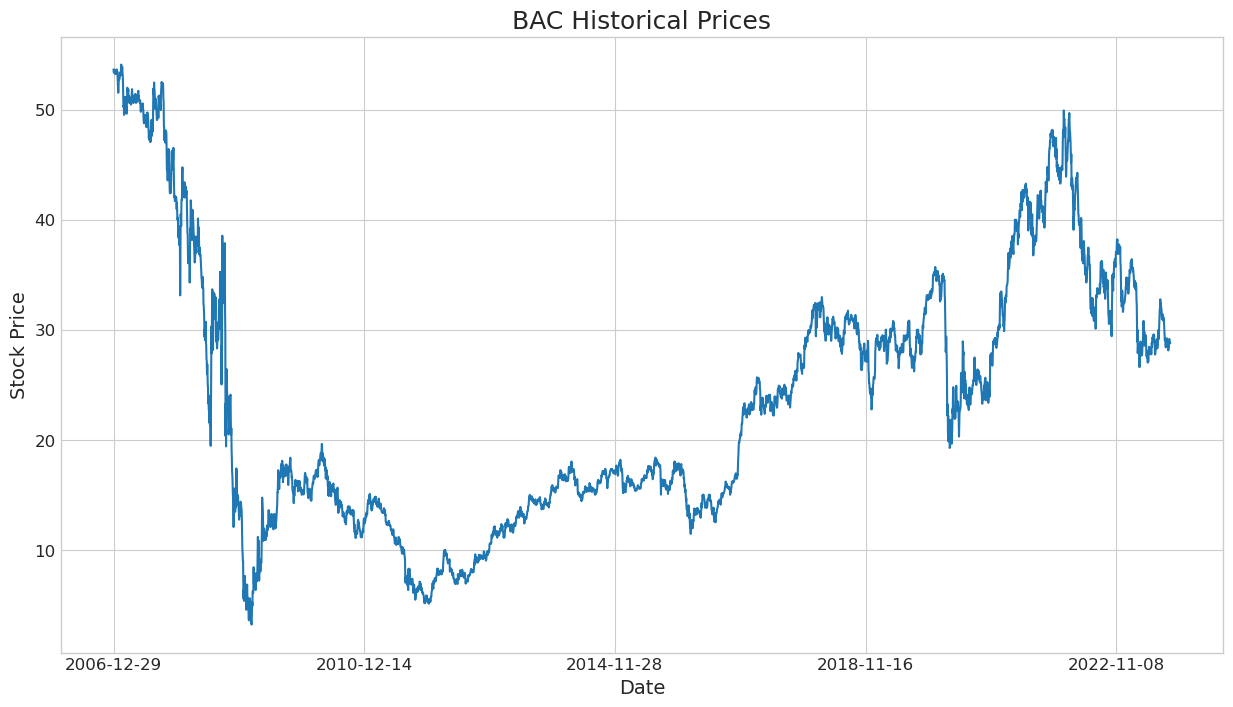

,open,high,low,close,volume
date,,,,,
2006-12-29,53.65,53.78,53.25,53.39,7613600
2007-01-03,53.40,54.18,52.99,53.33,16028300
2007-01-04,53.33,53.89,53.05,53.67,13236800
2007-01-05,53.59,53.59,53.03,53.24,10205000
2007-01-08,53.46,53.64,52.80,53.45,9685900
...,...,...,...,...,...
2023-09-14,29.17,29.44,29.10,29.20,44634811
2023-09-15,28.95,29.09,28.75,28.84,61661118
2023-09-18,28.80,28.80,28.49,28.76,25752313


In [14]:
BankOfAmerica = get_historic_data('BAC')
BankOfAmerica

In [15]:
SubsetBankOfAmerica = BankOfAmerica[start_date:end_date]
SubsetBankOfAmerica

,open,high,low,close,volume
date,,,,,
2007-01-03,53.40,54.180,52.99,53.33,16028300
2007-01-04,53.33,53.890,53.05,53.67,13236800
2007-01-05,53.59,53.590,53.03,53.24,10205000
2007-01-08,53.46,53.640,52.80,53.45,9685900
2007-01-09,53.60,53.710,52.97,53.50,12550500
...,...,...,...,...,...
2016-12-23,22.51,22.650,22.43,22.60,38187752
2016-12-27,22.71,22.735,22.54,22.61,39988630
2016-12-28,22.62,22.670,22.26,22.33,52652949


#### CitiGroup

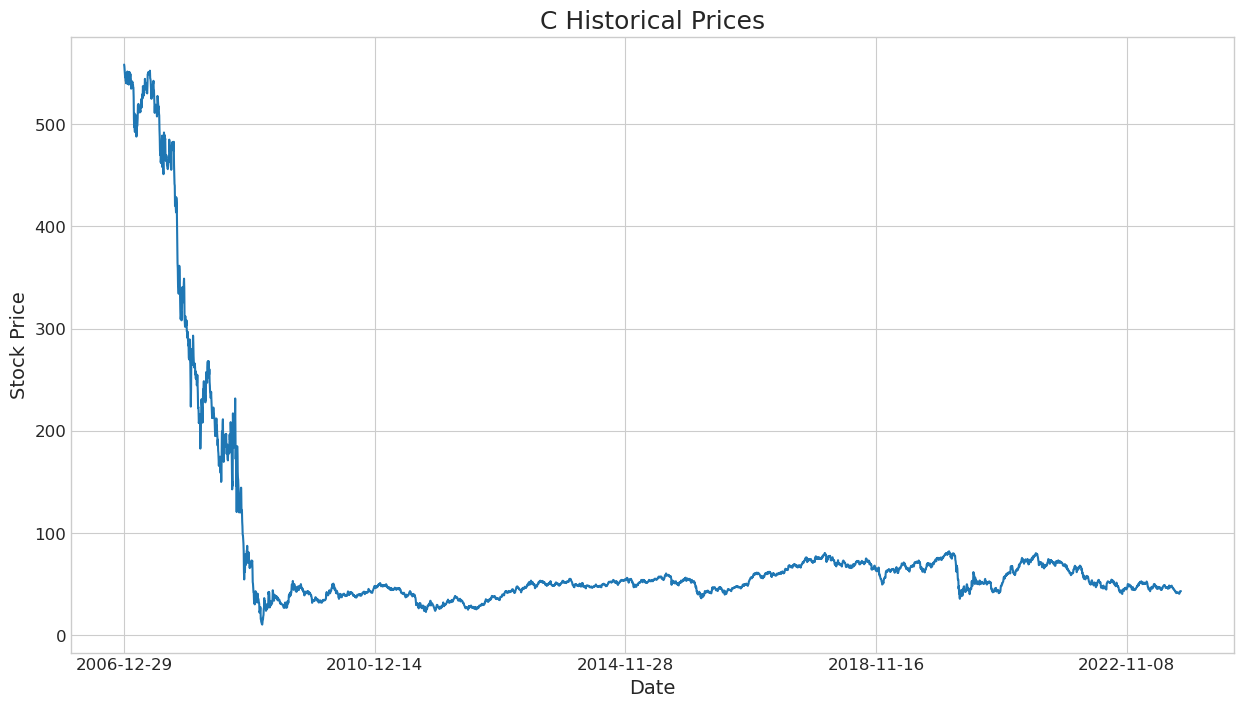

,open,high,low,close,volume
date,,,,,
2006-12-29,558.50,560.900,555.50,557.00,1103860.0
2007-01-03,556.60,562.800,547.20,552.50,2282110.0
2007-01-04,552.50,561.500,547.20,550.60,1658680.0
2007-01-05,550.00,550.500,544.60,547.70,1317880.0
2007-01-08,546.00,551.500,543.00,550.50,1249520.0
...,...,...,...,...,...
2023-09-14,42.79,43.435,42.73,43.14,19422820.0
2023-09-15,42.75,43.240,42.66,42.71,22983163.0
2023-09-18,42.60,42.775,42.40,42.64,10467376.0


In [16]:
CitiGroup = get_historic_data('C')
CitiGroup

In [17]:
SubsetCitiGroup= CitiGroup[start_date:end_date]
SubsetCitiGroup

,open,high,low,close,volume
date,,,,,
2007-01-03,556.60,562.8000,547.20,552.50,2282110.0
2007-01-04,552.50,561.5000,547.20,550.60,1658680.0
2007-01-05,550.00,550.5000,544.60,547.70,1317880.0
2007-01-08,546.00,551.5000,543.00,550.50,1249520.0
2007-01-09,550.10,551.5000,541.90,545.70,1965810.0
...,...,...,...,...,...
2016-12-23,60.53,61.0000,60.38,60.99,9313992.0
2016-12-27,61.03,61.3000,60.85,61.09,9544019.0
2016-12-28,61.00,61.2000,59.98,60.04,17127359.0


#### Goldman Sachs

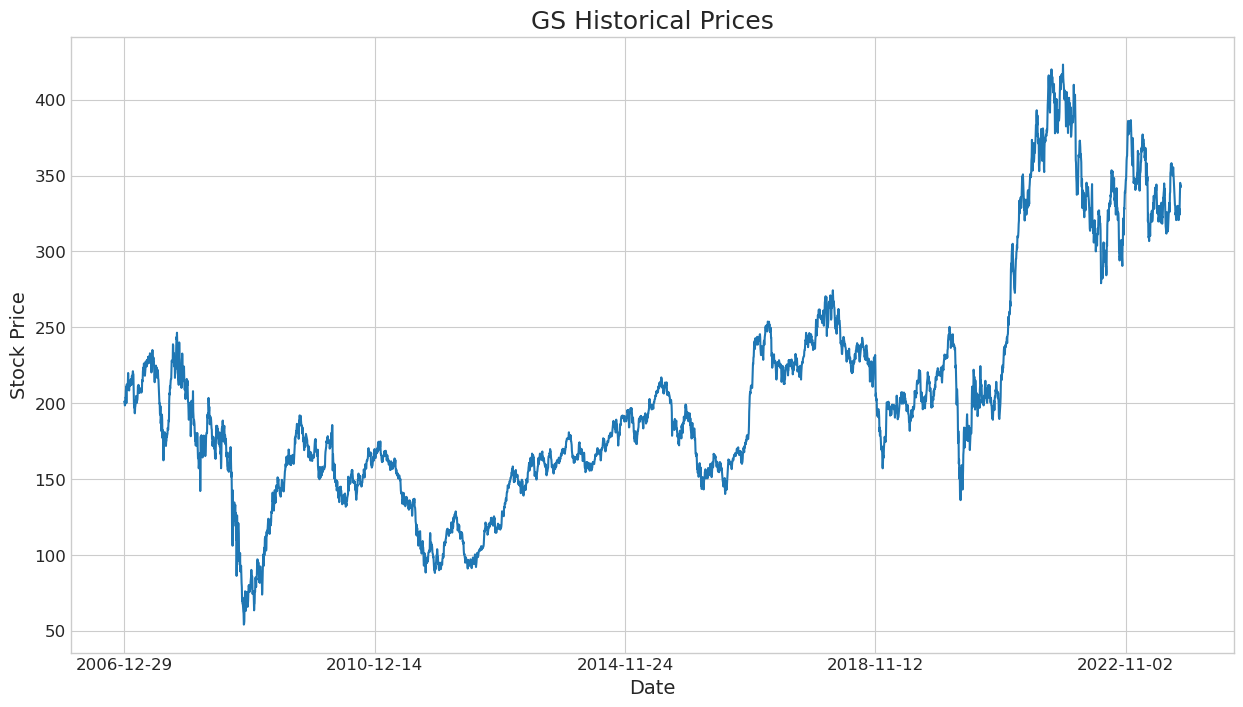

,open,high,low,close,volume
date,,,,,
2006-12-29,200.93,202.4000,199.3200,199.35,2762500
2007-01-03,200.60,203.3200,197.8200,200.72,6515000
2007-01-04,200.22,200.6700,198.0700,198.85,6478800
2007-01-05,198.43,200.0000,197.9000,199.05,6037100
2007-01-08,199.05,203.9500,198.1000,203.73,7851000
...,...,...,...,...,...
2023-09-14,339.00,345.1200,336.8500,344.57,2822721
2023-09-15,345.15,346.1900,341.8586,342.54,3063887
2023-09-18,342.54,344.2600,339.2700,343.32,1356719


In [18]:
GoldmanSachs = get_historic_data('GS')
GoldmanSachs

In [19]:
SubsetGoldmanSachs= GoldmanSachs[start_date:end_date]
SubsetGoldmanSachs

,open,high,low,close,volume
date,,,,,
2007-01-03,200.60,203.32,197.82,200.72,6515000
2007-01-04,200.22,200.67,198.07,198.85,6478800
2007-01-05,198.43,200.00,197.90,199.05,6037100
2007-01-08,199.05,203.95,198.10,203.73,7851000
2007-01-09,203.54,204.90,202.00,204.08,7177300
...,...,...,...,...,...
2016-12-23,239.54,241.90,238.91,240.97,2187498
2016-12-27,241.95,242.59,240.40,241.56,1998164
2016-12-28,243.69,244.50,240.44,240.65,3052978


#### JP Morgan Chase

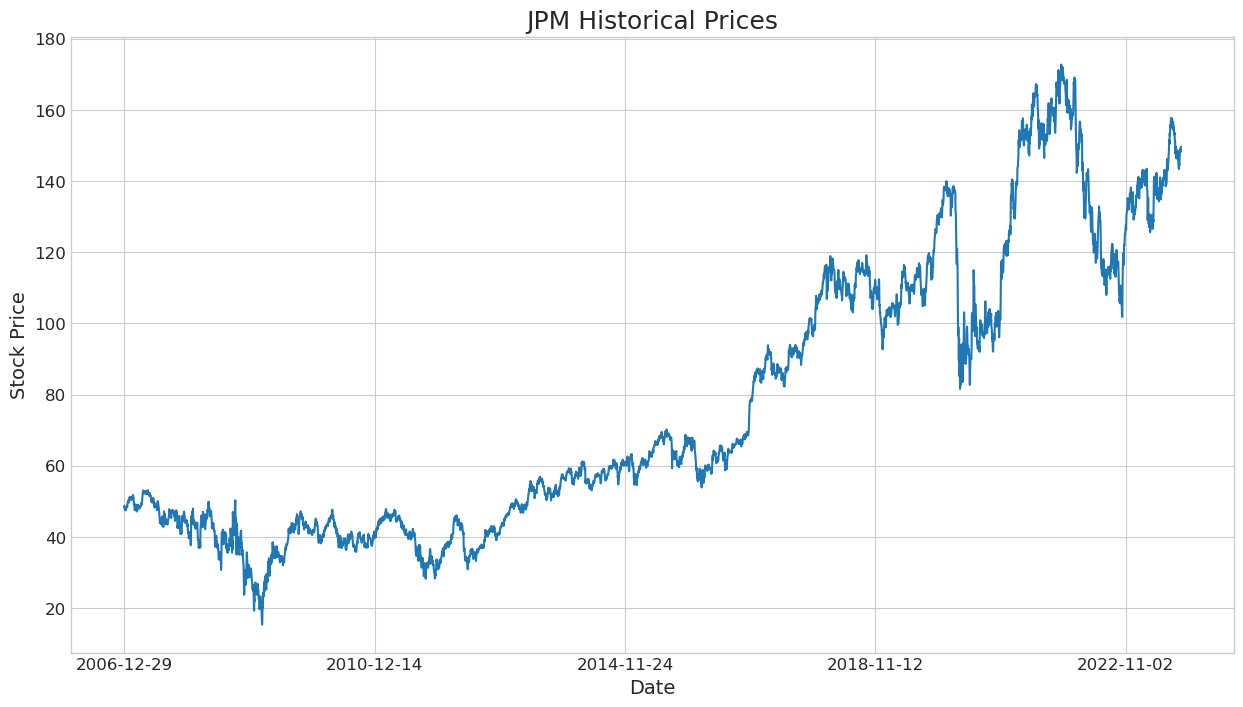

,open,high,low,close,volume
date,,,,,
2006-12-29,48.75,48.9100,48.270,48.30,9601700
2007-01-03,48.00,48.3700,47.590,48.07,14245200
2007-01-04,48.05,48.5500,47.750,48.19,9507000
2007-01-05,48.17,48.2500,47.630,47.79,10761000
2007-01-08,47.57,48.0600,47.320,47.95,8239200
...,...,...,...,...,...
2023-09-14,147.84,149.8950,147.520,149.25,10034931
2023-09-15,148.92,149.7256,148.310,148.81,19863383
2023-09-18,148.16,149.1400,147.750,149.12,6512360


In [20]:
JPMorganChase = get_historic_data('JPM')
JPMorganChase

In [21]:
SubsetJPMorganChase= JPMorganChase[start_date:end_date]
SubsetJPMorganChase

,open,high,low,close,volume
date,,,,,
2007-01-03,48.00,48.37,47.59,48.07,14245200
2007-01-04,48.05,48.55,47.75,48.19,9507000
2007-01-05,48.17,48.25,47.63,47.79,10761000
2007-01-08,47.57,48.06,47.32,47.95,8239200
2007-01-09,47.90,48.11,47.36,47.75,9279600
...,...,...,...,...,...
2016-12-23,87.00,87.15,86.40,87.05,10759433
2016-12-27,87.05,87.16,86.75,87.13,6946360
2016-12-28,87.16,87.39,86.35,86.50,9455586


#### Morgan Stanley

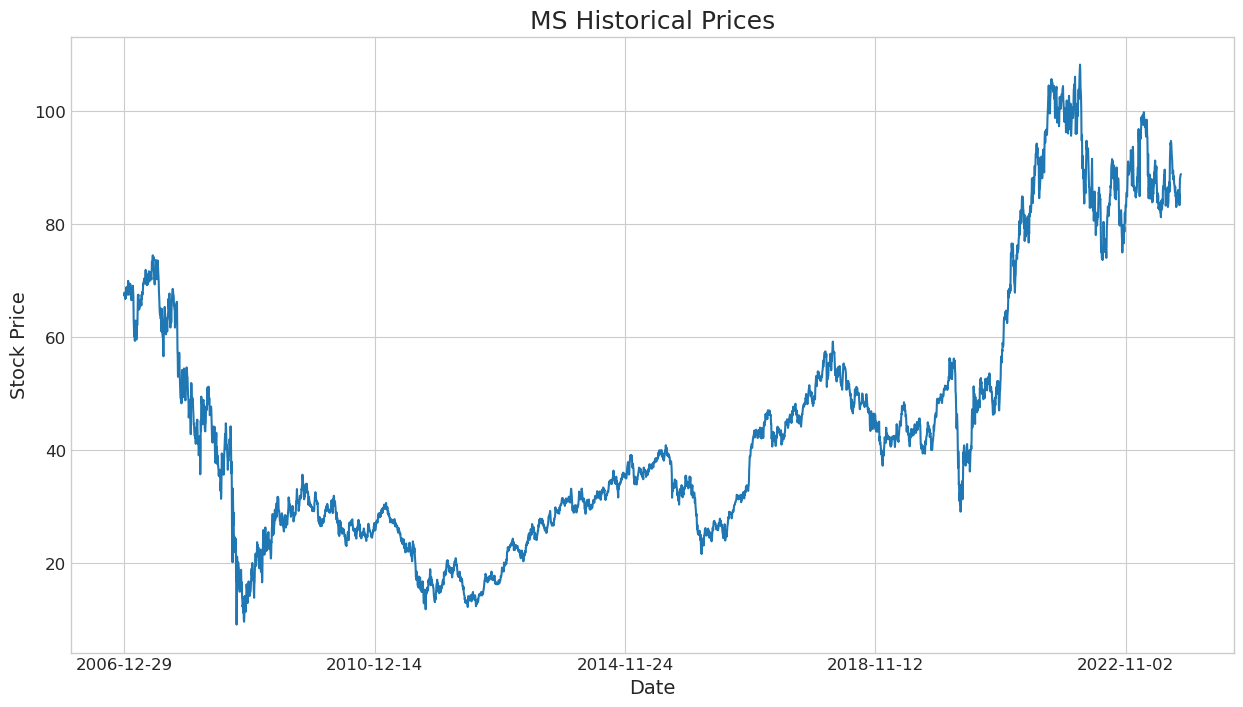

,open,high,low,close,volume
date,,,,,
2006-12-29,67.4175,67.9227,67.3015,67.4506,2.890528e+06
2007-01-03,67.8648,68.1878,66.9453,67.6080,5.814618e+06
2007-01-04,67.3181,68.2541,66.6803,67.8482,6.082266e+06
2007-01-05,67.3843,67.5831,66.5643,66.9785,5.643188e+06
2007-01-08,66.7714,67.6080,66.2992,67.3843,5.858562e+06
...,...,...,...,...,...
2023-09-14,88.0800,89.1050,87.9200,89.0700,8.109570e+06
2023-09-15,88.1850,88.7300,87.9400,88.4100,1.762951e+07
2023-09-18,88.5700,89.0500,87.5500,88.7100,5.501891e+06


In [22]:
MorganStanley = get_historic_data('MS')
MorganStanley

In [23]:
SubsetMorganStanley= MorganStanley[start_date:end_date]
SubsetMorganStanley

,open,high,low,close,volume
date,,,,,
2007-01-03,67.8648,68.1878,66.9453,67.6080,5.814618e+06
2007-01-04,67.3181,68.2541,66.6803,67.8482,6.082266e+06
2007-01-05,67.3843,67.5831,66.5643,66.9785,5.643188e+06
2007-01-08,66.7714,67.6080,66.2992,67.3843,5.858562e+06
2007-01-09,67.2601,67.7985,66.8625,67.2270,6.107015e+06
...,...,...,...,...,...
2016-12-23,42.8600,43.0700,42.7500,43.0600,6.732960e+06
2016-12-27,43.2700,43.2700,42.9500,43.1200,5.926956e+06
2016-12-28,43.2500,43.2900,42.5700,42.6200,4.854540e+06


#### Wells Fargo

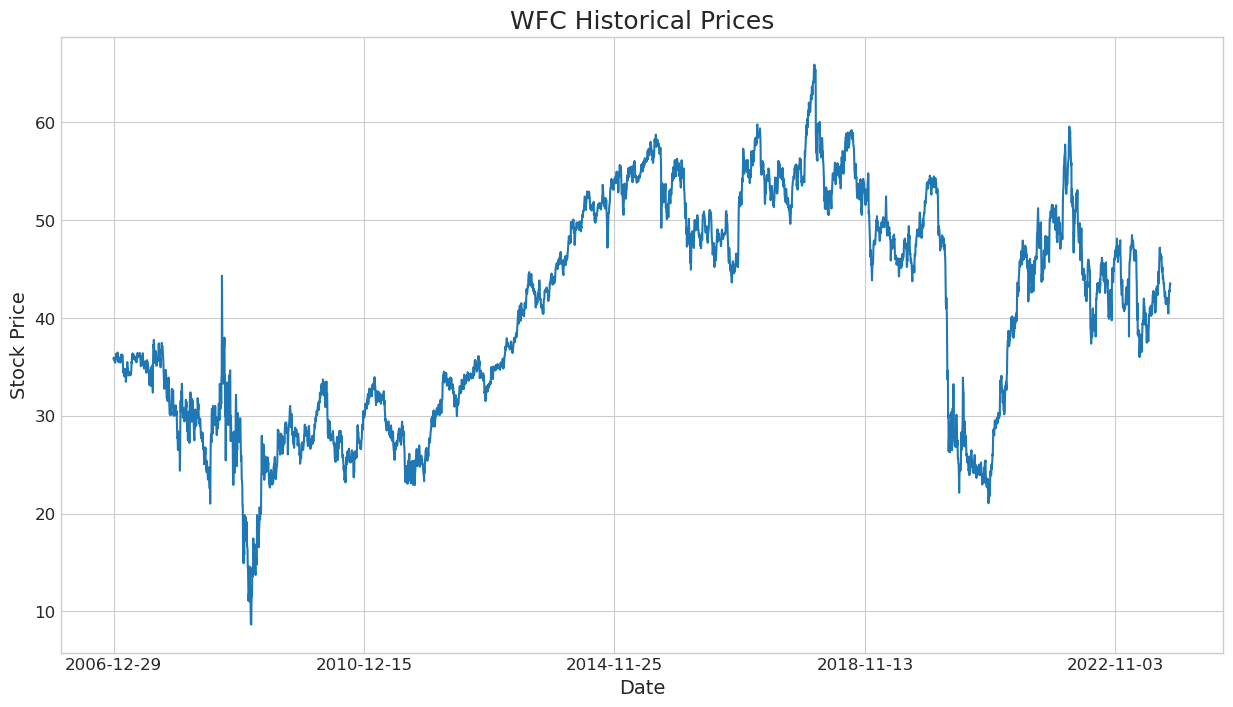

,open,high,low,close,volume
date,,,,,
2006-12-29,35.82,35.910,35.480,35.56,5992100
2007-01-03,35.93,36.010,35.370,35.74,12449200
2007-01-04,35.74,36.020,35.540,35.80,11065800
2007-01-05,35.79,35.830,35.510,35.60,10329200
2007-01-08,35.61,35.890,35.390,35.50,11651500
...,...,...,...,...,...
2023-09-14,42.81,43.390,42.700,43.05,20764473
2023-09-15,42.67,43.305,42.610,42.95,47371772
2023-09-18,42.99,43.600,42.770,43.43,15849745


In [24]:
WellsFargo = get_historic_data('WFC')
WellsFargo

In [25]:
SubsetWellsFargo= WellsFargo[start_date:end_date]
SubsetWellsFargo

,open,high,low,close,volume
date,,,,,
2007-01-03,35.93,36.01,35.3700,35.74,12449200
2007-01-04,35.74,36.02,35.5400,35.80,11065800
2007-01-05,35.79,35.83,35.5100,35.60,10329200
2007-01-08,35.61,35.89,35.3900,35.50,11651500
2007-01-09,35.58,35.85,35.4800,35.59,10160200
...,...,...,...,...,...
2016-12-23,55.78,55.98,55.6201,55.96,8312986
2016-12-27,55.90,56.10,55.8400,55.95,8893940
2016-12-28,55.98,56.08,55.2700,55.32,10609110


#### Building Working Set of DataFrames

In [26]:
#SubsetWellsFargo,SubsetMorganStanley,SubsetJPMorganChase,SubsetGoldmanSachs,SubsetCitiGroup,SubsetBankOfAmerica

In [27]:
ticker_symbols

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [28]:
Bank_Information = pd.concat([SubsetBankOfAmerica,SubsetCitiGroup,SubsetGoldmanSachs,SubsetJPMorganChase,SubsetMorganStanley,SubsetWellsFargo], axis = 1,join = 'outer',keys = ticker_symbols)
Bank_Information.head()

BAC                                       C                \
             open   high    low  close      volume   open   high    low   
date                                                                      
2007-01-03  53.40  54.18  52.99  53.33  16028300.0  556.6  562.8  547.2   
2007-01-04  53.33  53.89  53.05  53.67  13236800.0  552.5  561.5  547.2   
2007-01-05  53.59  53.59  53.03  53.24  10205000.0  550.0  550.5  544.6   
2007-01-08  53.46  53.64  52.80  53.45   9685900.0  546.0  551.5  543.0   
2007-01-09  53.60  53.71  52.97  53.50  12550500.0  550.1  551.5  541.9   

                              ...       MS                             \
            close     volume  ...     open     high      low    close   
date                          ...                                       
2007-01-03  552.5  2282110.0  ...  67.8648  68.1878  66.9453  67.6080   
2007-01-04  550.6  1658680.0  ...  67.3181  68.2541  66.6803  67.8482   
2007-01-05  547.7  1317880.0  ...  67.3843  67.5831  66.5643  66.9785   
2007-01-08  550.5  1249520.0  ...  66.7714  67.6080  66.2992  67.3843   
2007-01-09  545.7  1965810.0  ...  67.2601  67.7985  66.8625  67.2270   

                            WFC                                   
                  volume   open   high    low  close      volume  
date                                                              
2007-01-03  5.814618e+06  35.93  36.01  35.37  35.74  12449200.0  
2007-01-04  6.082266e+06  35.74  36.02  35.54  35.80  11065800.0  
2007-01-05  5.643188e+06  35.79  35.83  35.51  35.60  10329200.0  
2007-01-08  5.858562e+06  35.61  35.89  35.39  35.50  11651500.0  
2007-01-09  6.107015e+06  35.58  35.85  35.48  35.59  10160200.0  

[5 rows x 30 columns]

In [29]:
Bank_Information.columns.names = ['Bank Ticker','Stock Info']

In [30]:
Bank_Information

Bank Ticker    BAC                                       C                 \
Stock Info    open   high    low  close      volume   open   high     low   
date                                                                        
2007-01-03   53.40  54.18  52.99  53.33  16028300.0  556.6  562.8  547.20   
2007-01-04   53.33  53.89  53.05  53.67  13236800.0  552.5  561.5  547.20   
2007-01-05   53.59  53.59  53.03  53.24  10205000.0  550.0  550.5  544.60   
2007-01-08   53.46  53.64  52.80  53.45   9685900.0  546.0  551.5  543.00   
2007-01-09   53.60  53.71  52.97  53.50  12550500.0  550.1  551.5  541.90   
...            ...    ...    ...    ...         ...    ...    ...     ...   
2016-12-30   22.02  22.26  21.95  22.10  72605892.0   59.5   59.8   59.19   
2014-08-13     NaN    NaN    NaN    NaN         NaN    NaN    NaN     NaN   
2014-08-19     NaN    NaN    NaN    NaN         NaN    NaN    NaN     NaN   
2014-08-21     NaN    NaN    NaN    NaN         NaN    NaN    NaN     NaN   
2014-11-27     NaN    NaN    NaN    NaN         NaN    NaN    NaN     NaN   

Bank Ticker                      ...       MS                             \
Stock Info    close      volume  ...     open     high      low    close   
date                             ...                                       
2007-01-03   552.50   2282110.0  ...  67.8648  68.1878  66.9453  67.6080   
2007-01-04   550.60   1658680.0  ...  67.3181  68.2541  66.6803  67.8482   
2007-01-05   547.70   1317880.0  ...  67.3843  67.5831  66.5643  66.9785   
2007-01-08   550.50   1249520.0  ...  66.7714  67.6080  66.2992  67.3843   
2007-01-09   545.70   1965810.0  ...  67.2601  67.7985  66.8625  67.2270   
...             ...         ...  ...      ...      ...      ...      ...   
2016-12-30    59.43  16588499.0  ...  42.1700  42.5500  41.8800  42.2500   
2014-08-13      NaN         NaN  ...  32.1500  32.2600  32.0100  32.0200   
2014-08-19      NaN         NaN  ...  32.6900  32.8400  32.5300  32.5300   
2014-08-21      NaN         NaN  ...  32.6600  33.0500  32.5000  33.0300   
2014-11-27      NaN         NaN  ...  35.4200  35.4200  35.0700  35.1200   

Bank Ticker                  WFC                                    
Stock Info         volume   open   high     low  close      volume  
date                                                                
2007-01-03   5.814618e+06  35.93  36.01  35.370  35.74  12449200.0  
2007-01-04   6.082266e+06  35.74  36.02  35.540  35.80  11065800.0  
2007-01-05   5.643188e+06  35.79  35.83  35.510  35.60  10329200.0  
2007-01-08   5.858562e+06  35.61  35.89  35.390  35.50  11651500.0  
2007-01-09   6.107015e+06  35.58  35.85  35.480  35.59  10160200.0  
...                   ...    ...    ...     ...    ...         ...  
2016-12-30   6.943549e+06  54.89  55.36  54.790  55.11  15095516.0  
2014-08-13   4.837895e+06  50.02  50.12  49.835  49.99  12283076.0  
2014-08-19   4.257034e+06  50.77  51.09  50.750  50.86   8718438.0  
2014-08-21   7.309125e+06  51.00  51.40  50.900  51.29  10102238.0  
2014-11-27   6.138841e+06  54.19  54.42  53.970  54.28  11792469.0  

[2530 rows x 30 columns]

#### Max Opening Price for Each Stock

In [31]:
Bank_Information["BAC"]["close"].max()

54.05

In [32]:
for i in range(0,len(ticker_symbols)):
    Bank_Information[ticker_symbols[i]]["close"].max()
    print(ticker_symbols[i]+':'+str(Bank_Information[ticker_symbols[i]]["close"].max()))

BAC:54.05
C:552.5
GS:247.92
JPM:87.13
MS:73.9695
WFC:58.52


### Returns

In [36]:
returns = pd.DataFrame()

In [37]:
for i in range(0,len(ticker_symbols)):
    returns[ticker_symbols[i]+' Return'] = Bank_Information[ticker_symbols[i]]["close"].pct_change()

returns.head(3)
    

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.006375,-0.003439,-0.009316,0.002496,0.003553,0.001679
2007-01-05,-0.008012,-0.005267,0.001006,-0.008300,-0.012818,-0.005587


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


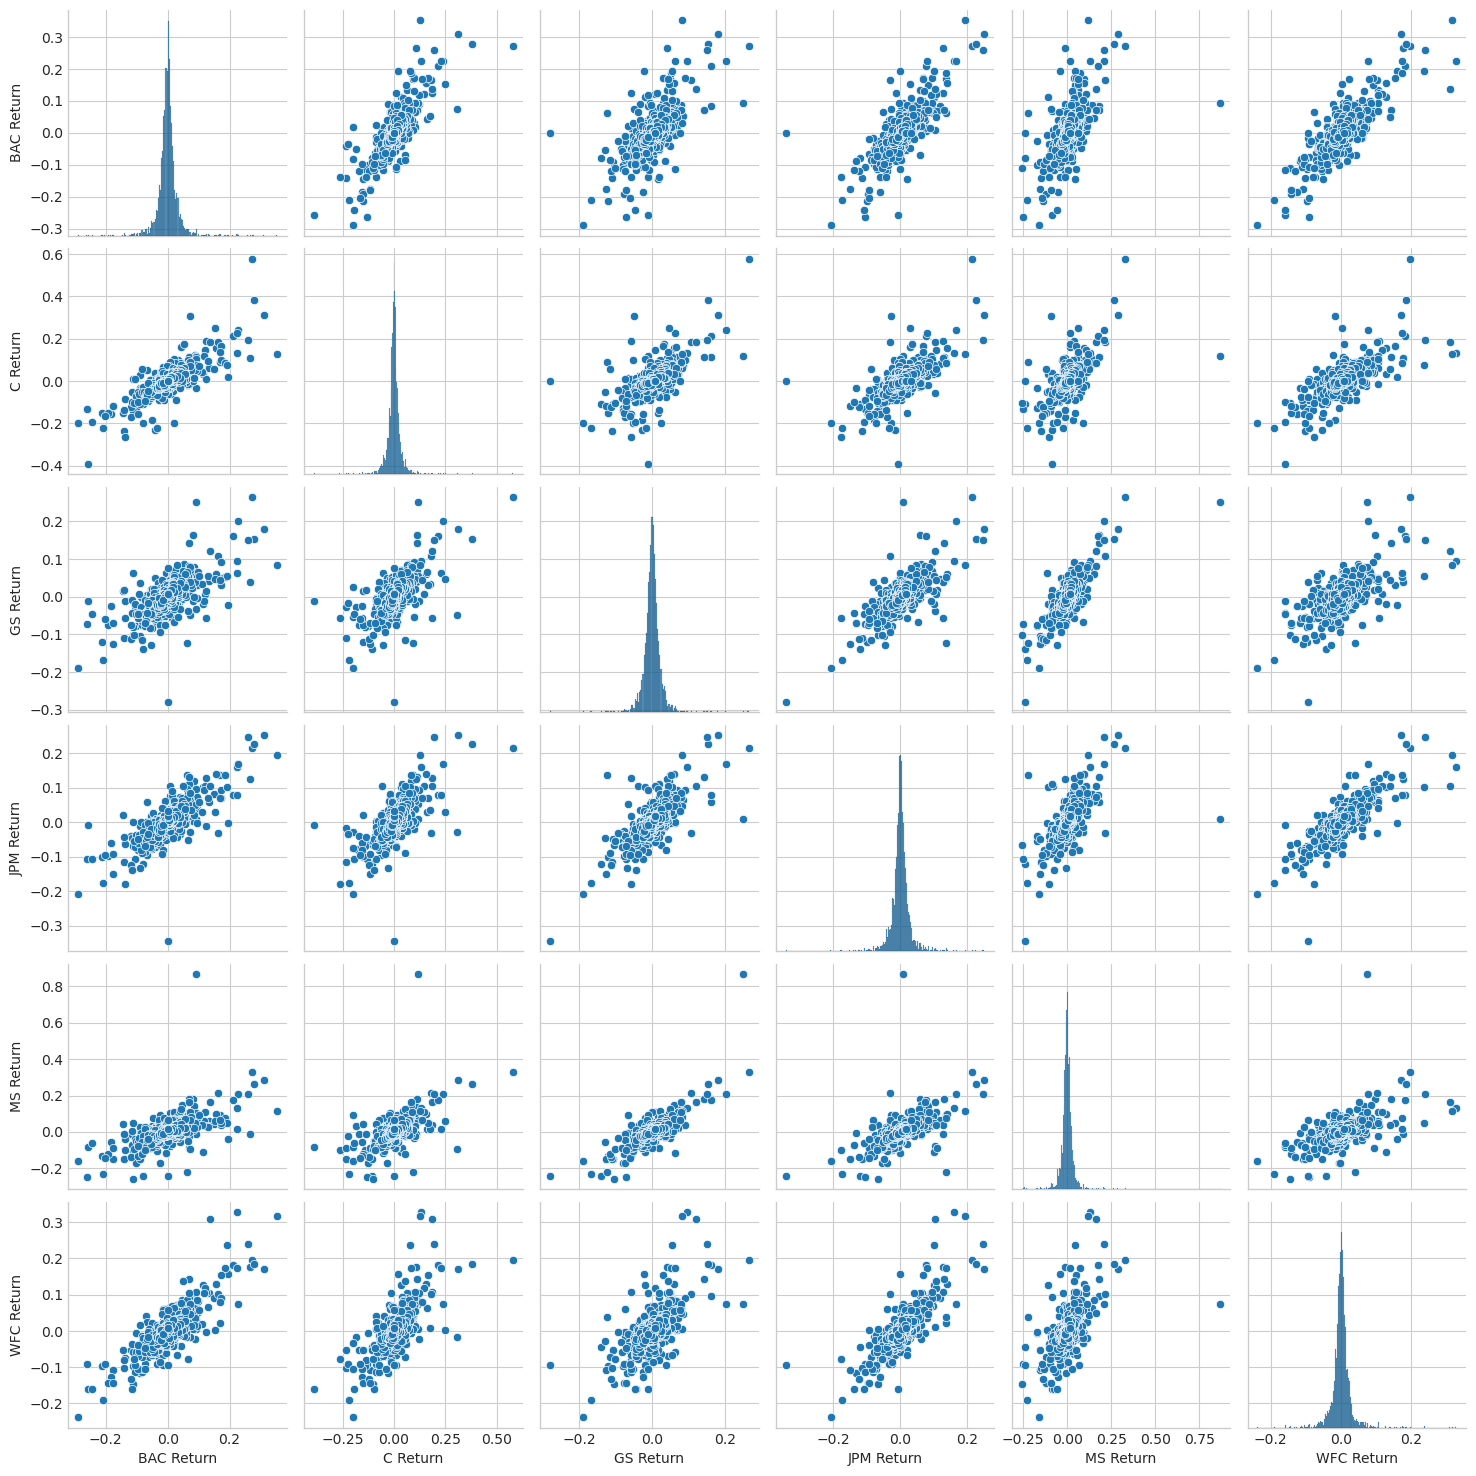

In [39]:
sns.pairplot(returns)

# Show the pairplot
plt.show()

### Best Return

In [40]:
for i in returns.columns:
    #returns[i].idxmax()
    print(str(i)+" "+returns[i].idxmax())

BAC Return 2009-04-09
C Return 2008-11-24
GS Return 2008-11-24
JPM Return 2009-01-21
MS Return 2008-10-13
WFC Return 2008-07-16


### Worst Return

In [41]:
for i in returns.columns:
    #returns[i].idxmax()
    print(str(i)+" "+returns[i].idxmin())

BAC Return 2009-01-20
C Return 2009-02-27
GS Return 2014-08-13
JPM Return 2014-08-13
MS Return 2008-10-09
WFC Return 2009-01-20


### Standard Deviation

In [44]:
for i in returns.columns:
    #returns[i].idxmax()
    print(str(i)+" "+str(returns[i].std()))

BAC Return 0.03700571890117672
C Return 0.038978837262487055
GS Return 0.026054893717782735
JPM Return 0.02865080424902292
MS Return 0.03827760902615874
WFC Return 0.030493060921665253


In [45]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.006375,-0.003439,-0.009316,0.002496,0.003553,0.001679
2007-01-05,-0.008012,-0.005267,0.001006,-0.008300,-0.012818,-0.005587
2007-01-08,0.003944,0.005112,0.023512,0.003348,0.006059,-0.002809
2007-01-09,0.000935,-0.008719,0.001718,-0.004171,-0.002334,0.002535
...,...,...,...,...,...,...
2016-12-30,0.004545,0.000842,0.005332,0.004657,0.002372,0.004923
2014-08-13,0.000000,0.000000,-0.280142,-0.342682,-0.242130,-0.092905
2014-08-19,0.000000,0.000000,0.009224,0.014810,0.015928,0.017403


In [46]:
returns.std()

BAC Return    0.037006
C Return      0.038979
GS Return     0.026055
JPM Return    0.028651
MS Return     0.038278
WFC Return    0.030493
dtype: float64

In [47]:
returns['BAC Return'].idxmax()

'2009-04-09'

In [52]:
returns['BAC Return'].idxmin().startswith('2009')

True

In [58]:
returnsindexes = returns.index
returnsindexeslist = returnsindexes.tolist()
returnsindexeslist

['2007-01-03',
 '2007-01-04',
 '2007-01-05',
 '2007-01-08',
 '2007-01-09',
 '2007-01-10',
 '2007-01-11',
 '2007-01-12',
 '2007-01-16',
 '2007-01-17',
 '2007-01-18',
 '2007-01-19',
 '2007-01-22',
 '2007-01-23',
 '2007-01-24',
 '2007-01-25',
 '2007-01-26',
 '2007-01-29',
 '2007-01-30',
 '2007-01-31',
 '2007-02-01',
 '2007-02-02',
 '2007-02-05',
 '2007-02-06',
 '2007-02-07',
 '2007-02-08',
 '2007-02-09',
 '2007-02-12',
 '2007-02-13',
 '2007-02-14',
 '2007-02-15',
 '2007-02-16',
 '2007-02-20',
 '2007-02-21',
 '2007-02-22',
 '2007-02-23',
 '2007-02-26',
 '2007-02-27',
 '2007-02-28',
 '2007-03-01',
 '2007-03-02',
 '2007-03-05',
 '2007-03-06',
 '2007-03-07',
 '2007-03-08',
 '2007-03-09',
 '2007-03-12',
 '2007-03-13',
 '2007-03-14',
 '2007-03-15',
 '2007-03-16',
 '2007-03-19',
 '2007-03-20',
 '2007-03-21',
 '2007-03-22',
 '2007-03-23',
 '2007-03-26',
 '2007-03-27',
 '2007-03-28',
 '2007-03-29',
 '2007-03-30',
 '2007-04-02',
 '2007-04-03',
 '2007-04-04',
 '2007-04-05',
 '2007-04-09',
 '2007-04-

In [60]:
startwith2015 = []
for i in returnsindexeslist:
    if i.startswith('2015') == True:
        startwith2015.append(i)
startwith2015

['2015-01-02',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-12',
 '2015-01-13',
 '2015-01-14',
 '2015-01-15',
 '2015-01-16',
 '2015-01-20',
 '2015-01-21',
 '2015-01-22',
 '2015-01-23',
 '2015-01-26',
 '2015-01-27',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-02-02',
 '2015-02-03',
 '2015-02-04',
 '2015-02-05',
 '2015-02-06',
 '2015-02-09',
 '2015-02-10',
 '2015-02-11',
 '2015-02-12',
 '2015-02-13',
 '2015-02-17',
 '2015-02-18',
 '2015-02-19',
 '2015-02-20',
 '2015-02-23',
 '2015-02-24',
 '2015-02-25',
 '2015-02-26',
 '2015-02-27',
 '2015-03-02',
 '2015-03-03',
 '2015-03-04',
 '2015-03-05',
 '2015-03-06',
 '2015-03-09',
 '2015-03-10',
 '2015-03-11',
 '2015-03-12',
 '2015-03-13',
 '2015-03-16',
 '2015-03-17',
 '2015-03-18',
 '2015-03-19',
 '2015-03-20',
 '2015-03-23',
 '2015-03-24',
 '2015-03-25',
 '2015-03-26',
 '2015-03-27',
 '2015-03-30',
 '2015-03-31',
 '2015-04-01',
 '2015-04-02',
 '2015-04-06',
 '2015-04-07',
 '2015-04-08',
 '2015-04-

In [61]:
returns.loc['2015-01-02':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

#### Returns Data in 2015

In [62]:
Subsetreturns2015 = returns['2015-01-02':'2015-12-31']
Subsetreturns2015

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


/tmp/ipykernel_28471/123165403.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Subsetreturns2015["JPM Return"],kde = True)


<Axes: xlabel='JPM Return', ylabel='Density'>

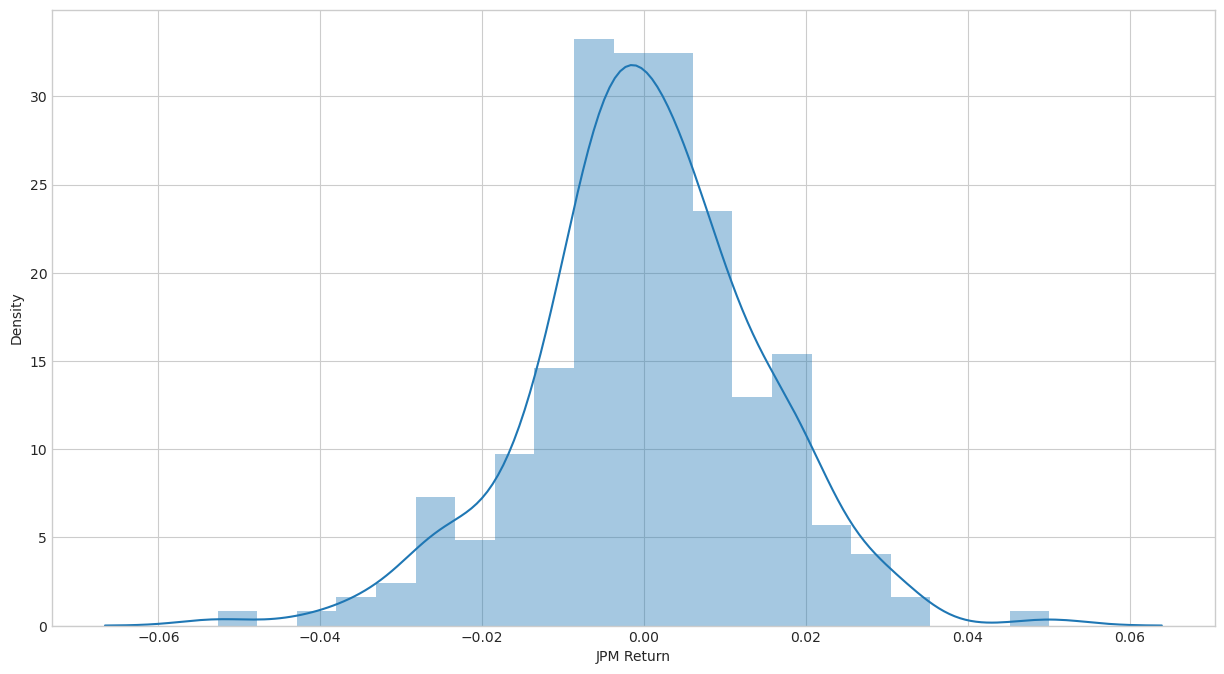

In [63]:
sns.distplot(Subsetreturns2015["JPM Return"],kde = True)

In [66]:
startswith2008 = []
for i in returnsindexeslist:
    if i.startswith('2008') == True:
        startswith2008.append(i)
startswith2008

['2008-01-02',
 '2008-01-03',
 '2008-01-04',
 '2008-01-07',
 '2008-01-08',
 '2008-01-09',
 '2008-01-10',
 '2008-01-11',
 '2008-01-14',
 '2008-01-15',
 '2008-01-16',
 '2008-01-17',
 '2008-01-18',
 '2008-01-22',
 '2008-01-23',
 '2008-01-24',
 '2008-01-25',
 '2008-01-28',
 '2008-01-29',
 '2008-01-30',
 '2008-01-31',
 '2008-02-01',
 '2008-02-04',
 '2008-02-05',
 '2008-02-06',
 '2008-02-07',
 '2008-02-08',
 '2008-02-11',
 '2008-02-12',
 '2008-02-13',
 '2008-02-14',
 '2008-02-15',
 '2008-02-19',
 '2008-02-20',
 '2008-02-21',
 '2008-02-22',
 '2008-02-25',
 '2008-02-26',
 '2008-02-27',
 '2008-02-28',
 '2008-02-29',
 '2008-03-03',
 '2008-03-04',
 '2008-03-05',
 '2008-03-06',
 '2008-03-07',
 '2008-03-10',
 '2008-03-11',
 '2008-03-12',
 '2008-03-13',
 '2008-03-14',
 '2008-03-17',
 '2008-03-18',
 '2008-03-19',
 '2008-03-20',
 '2008-03-24',
 '2008-03-25',
 '2008-03-26',
 '2008-03-27',
 '2008-03-28',
 '2008-03-31',
 '2008-04-01',
 '2008-04-02',
 '2008-04-03',
 '2008-04-04',
 '2008-04-07',
 '2008-04-

#### Returns data in 2008

In [67]:
Subsetreturns2008 = returns['2008-01-02':'2008-12-31']
Subsetreturns2008

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2008-01-02,-0.016966,-0.017663,-0.034643,-0.033906,-0.040670,-0.036105
2008-01-03,-0.006410,0.000346,-0.013295,-0.006877,-0.000196,-0.019931
2008-01-04,-0.011166,-0.023851,-0.023970,-0.022684,-0.032195,-0.036115
2008-01-07,0.001255,0.000708,-0.026009,0.010017,-0.020081,0.006912
2008-01-08,-0.037343,-0.039632,-0.026858,-0.039671,-0.039536,-0.042630
...,...,...,...,...,...,...
2008-12-24,0.061176,0.039877,0.016489,0.025421,0.004155,0.018155
2008-12-26,-0.012565,-0.007375,-0.006149,-0.001675,0.010345,0.001092
2008-12-29,-0.031437,-0.023774,0.007766,-0.000671,0.017065,0.011632


/tmp/ipykernel_28471/1636599667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Subsetreturns2008["C Return"], kde = True)


<Axes: xlabel='C Return', ylabel='Density'>

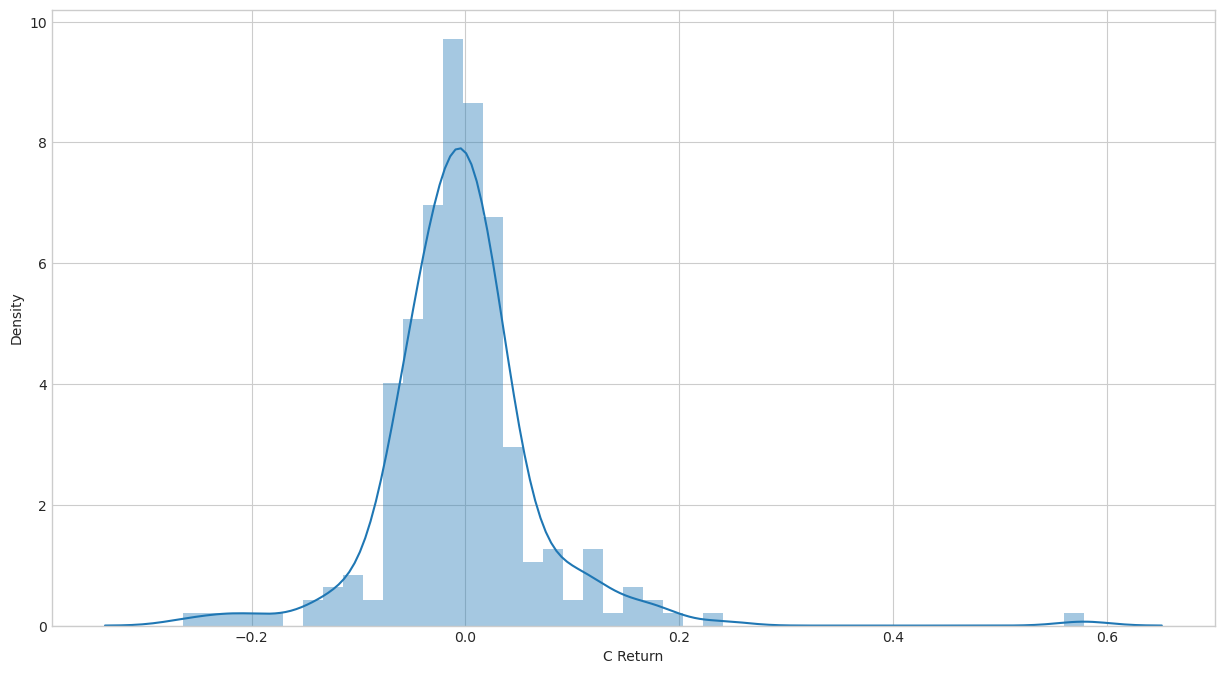

In [68]:
sns.distplot(Subsetreturns2008["C Return"], kde = True)

### More Visualization

#### Closing Prices Line Graph

In [70]:
Bank_Information

Bank Ticker    BAC                                       C                 \
Stock Info    open   high    low  close      volume   open   high     low   
date                                                                        
2007-01-03   53.40  54.18  52.99  53.33  16028300.0  556.6  562.8  547.20   
2007-01-04   53.33  53.89  53.05  53.67  13236800.0  552.5  561.5  547.20   
2007-01-05   53.59  53.59  53.03  53.24  10205000.0  550.0  550.5  544.60   
2007-01-08   53.46  53.64  52.80  53.45   9685900.0  546.0  551.5  543.00   
2007-01-09   53.60  53.71  52.97  53.50  12550500.0  550.1  551.5  541.90   
...            ...    ...    ...    ...         ...    ...    ...     ...   
2016-12-30   22.02  22.26  21.95  22.10  72605892.0   59.5   59.8   59.19   
2014-08-13     NaN    NaN    NaN    NaN         NaN    NaN    NaN     NaN   
2014-08-19     NaN    NaN    NaN    NaN         NaN    NaN    NaN     NaN   
2014-08-21     NaN    NaN    NaN    NaN         NaN    NaN    NaN     NaN   
2014-11-27     NaN    NaN    NaN    NaN         NaN    NaN    NaN     NaN   

Bank Ticker                      ...       MS                             \
Stock Info    close      volume  ...     open     high      low    close   
date                             ...                                       
2007-01-03   552.50   2282110.0  ...  67.8648  68.1878  66.9453  67.6080   
2007-01-04   550.60   1658680.0  ...  67.3181  68.2541  66.6803  67.8482   
2007-01-05   547.70   1317880.0  ...  67.3843  67.5831  66.5643  66.9785   
2007-01-08   550.50   1249520.0  ...  66.7714  67.6080  66.2992  67.3843   
2007-01-09   545.70   1965810.0  ...  67.2601  67.7985  66.8625  67.2270   
...             ...         ...  ...      ...      ...      ...      ...   
2016-12-30    59.43  16588499.0  ...  42.1700  42.5500  41.8800  42.2500   
2014-08-13      NaN         NaN  ...  32.1500  32.2600  32.0100  32.0200   
2014-08-19      NaN         NaN  ...  32.6900  32.8400  32.5300  32.5300   
2014-08-21      NaN         NaN  ...  32.6600  33.0500  32.5000  33.0300   
2014-11-27      NaN         NaN  ...  35.4200  35.4200  35.0700  35.1200   

Bank Ticker                  WFC                                    
Stock Info         volume   open   high     low  close      volume  
date                                                                
2007-01-03   5.814618e+06  35.93  36.01  35.370  35.74  12449200.0  
2007-01-04   6.082266e+06  35.74  36.02  35.540  35.80  11065800.0  
2007-01-05   5.643188e+06  35.79  35.83  35.510  35.60  10329200.0  
2007-01-08   5.858562e+06  35.61  35.89  35.390  35.50  11651500.0  
2007-01-09   6.107015e+06  35.58  35.85  35.480  35.59  10160200.0  
...                   ...    ...    ...     ...    ...         ...  
2016-12-30   6.943549e+06  54.89  55.36  54.790  55.11  15095516.0  
2014-08-13   4.837895e+06  50.02  50.12  49.835  49.99  12283076.0  
2014-08-19   4.257034e+06  50.77  51.09  50.750  50.86   8718438.0  
2014-08-21   7.309125e+06  51.00  51.40  50.900  51.29  10102238.0  
2014-11-27   6.138841e+06  54.19  54.42  53.970  54.28  11792469.0  

[2530 rows x 30 columns]

In [73]:
Bank_Information["BAC"]["close"]

date
2007-01-03    53.33
2007-01-04    53.67
2007-01-05    53.24
2007-01-08    53.45
2007-01-09    53.50
              ...  
2016-12-30    22.10
2014-08-13      NaN
2014-08-19      NaN
2014-08-21      NaN
2014-11-27      NaN
Name: close, Length: 2530, dtype: float64

In [74]:
Closing = pd.DataFrame()
column_names = ticker_symbols

In [75]:
for i in column_names:
    ClosingPrices = Bank_Information[i]["close"]
    Closing[i] = ClosingPrices

In [76]:
Closing

,BAC,C,GS,JPM,MS,WFC
date,,,,,,
2007-01-03,53.33,552.50,200.72,48.07,67.6080,35.74
2007-01-04,53.67,550.60,198.85,48.19,67.8482,35.80
2007-01-05,53.24,547.70,199.05,47.79,66.9785,35.60
2007-01-08,53.45,550.50,203.73,47.95,67.3843,35.50
2007-01-09,53.50,545.70,204.08,47.75,67.2270,35.59
...,...,...,...,...,...,...
2016-12-30,22.10,59.43,239.45,86.29,42.2500,55.11
2014-08-13,NaN,NaN,172.37,56.72,32.0200,49.99
2014-08-19,NaN,NaN,173.96,57.56,32.5300,50.86


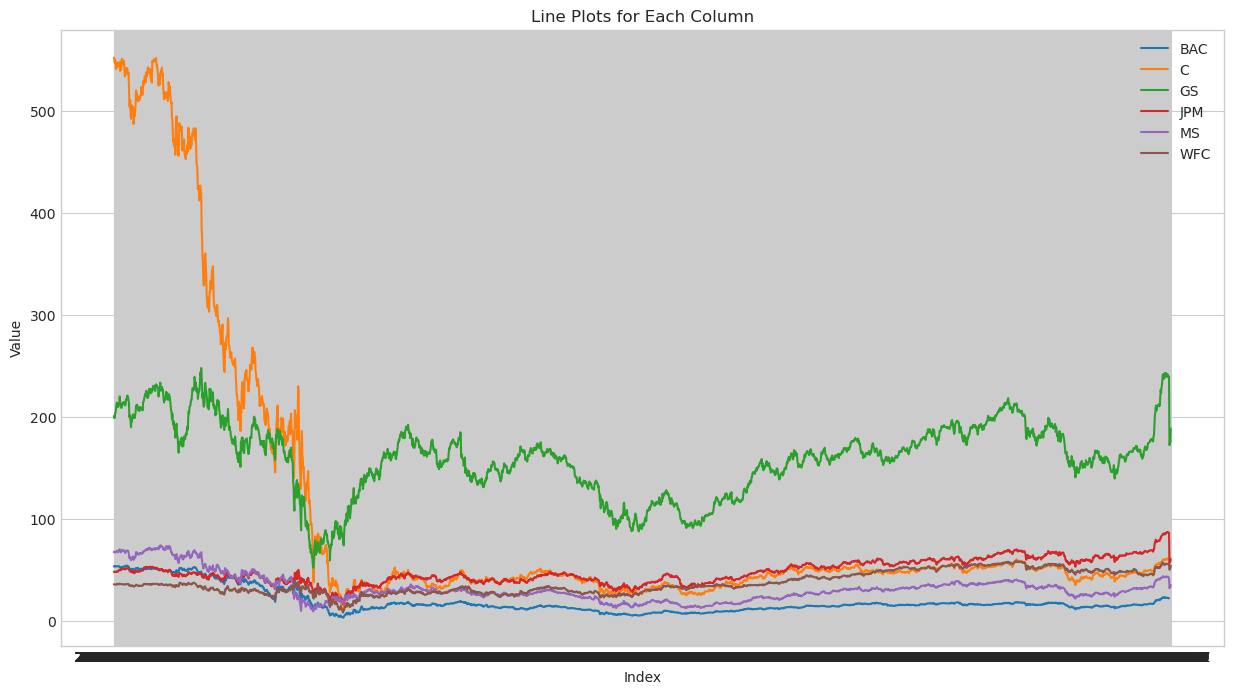

In [77]:
for i in Closing.columns:
    sns.lineplot(x=Closing.index, y=Closing[i], label=i)

plt.title("Line Plots for Each Column")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

### MovingAverages

In [79]:
SubsetBankInformation2008 = Bank_Information['2008-01-02':'2008-12-31']
SubsetBankInformation2008

Bank Ticker    BAC                                        C                  \
Stock Info    open   high    low  close       volume   open   high      low   
date                                                                          
2008-01-02   41.53  41.55  40.35  40.56   30767876.0  297.0  298.9  288.500   
2008-01-03   40.63  40.81  40.25  40.30   22589488.0  292.2  293.9  288.900   
2008-01-04   40.00  40.29  39.76  39.85   34924119.0  286.0  290.3  280.400   
2008-01-07   40.05  40.24  39.26  39.90   31885085.0  283.4  287.6  279.300   
2008-01-08   40.18  40.21  38.28  38.41   42147262.0  284.6  287.0  270.100   
...            ...    ...    ...    ...          ...    ...    ...      ...   
2008-12-24   12.75  13.56  12.74  13.53   38095179.0   65.5   68.0   65.300   
2008-12-26   13.66  13.80  13.29  13.36   43711504.0   68.4   70.3   66.675   
2008-12-29   13.57  13.73  12.68  12.94   62813616.0   68.3   68.5   65.100   
2008-12-30   13.09  13.24  12.66  13.24   72925374.0   66.6   68.2   65.300   
2008-12-31   13.09  14.12  13.00  14.08  113428390.0   67.2   70.4   66.200   

Bank Ticker                    ...     MS                                   \
Stock Info   close     volume  ...   open   high    low  close      volume   
date                           ...                                           
2008-01-02   289.2  6214640.3  ...  52.96  53.40  50.31  50.95  17625056.0   
2008-01-03   289.3  5965786.9  ...  51.21  51.89  50.58  50.94  11422184.0   
2008-01-04   282.4  7545426.6  ...  49.92  50.69  48.86  49.30  14449204.0   
2008-01-07   282.6  6892214.0  ...  49.50  49.84  47.95  48.31  18767492.0   
2008-01-08   271.4  9998935.9  ...  48.65  48.97  45.88  46.40  22468353.0   
...            ...        ...  ...    ...    ...    ...    ...         ...   
2008-12-24    67.8  4007266.0  ...  14.25  14.75  14.21  14.50   5256910.0   
2008-12-26    67.3  4813285.1  ...  14.81  14.86  14.35  14.65   4492130.0   
2008-12-29    65.7  6122546.1  ...  14.87  14.97  14.17  14.90  12057176.0   
2008-12-30    68.0  7344716.4  ...  15.01  15.31  14.63  15.19  14044885.0   
2008-12-31    67.1  9267595.8  ...  15.16  16.08  15.03  16.04  15023627.0   

Bank Ticker    WFC                                   
Stock Info    open   high    low  close      volume  
date                                                 
2008-01-02   30.48  30.48  28.98  29.10  24387712.0  
2008-01-03   29.25  29.37  28.17  28.52  26313032.0  
2008-01-04   28.30  28.32  26.99  27.49  50819094.0  
2008-01-07   27.70  28.04  27.11  27.68  25887073.0  
2008-01-08   27.87  28.11  26.37  26.50  41501433.0  
...            ...    ...    ...    ...         ...  
2008-12-24   27.30  27.68  26.86  27.48  11225354.0  
2008-12-26   27.57  27.86  27.15  27.51  12398590.0  
2008-12-29   27.89  27.91  27.30  27.83  20981399.0  
2008-12-30   27.81  28.80  27.61  28.80  28638349.0  
2008-12-31   28.69  30.49  28.20  29.48  45126460.0  

[253 rows x 30 columns]

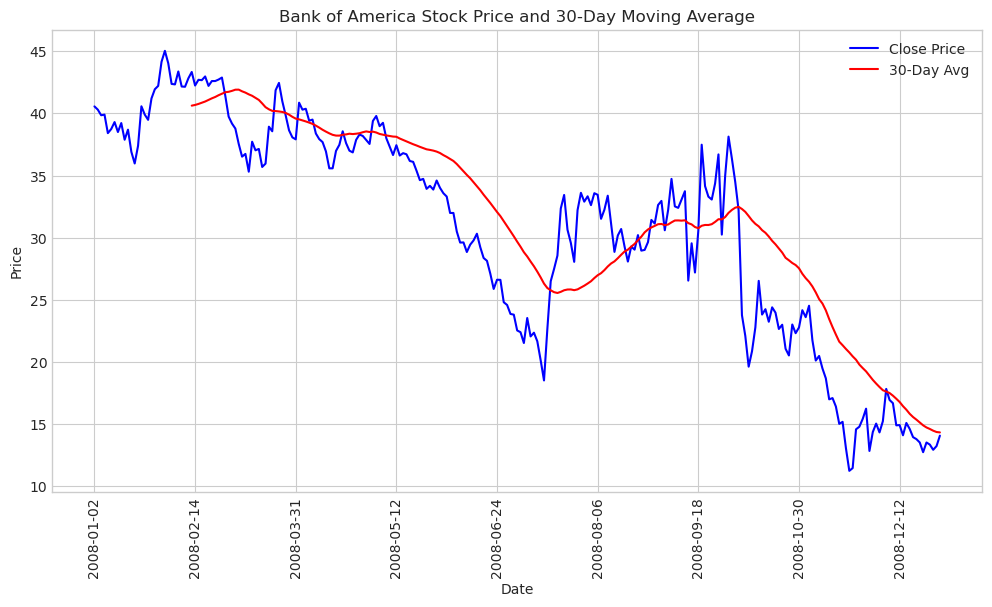

In [94]:
# Create a plot of the Close Price and the rolling 30-day average
plt.figure(figsize=(12, 6))
plt.plot(SubsetBankInformation2008.index, SubsetBankInformation2008["BAC"]['close'], label='Close Price', color='blue')
plt.plot(SubsetBankInformation2008.index, SubsetBankInformation2008["BAC"]["close"].rolling(window=30).mean(), label='30-Day Avg', color='red')
plt.title('Bank of America Stock Price and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation = 90)
plt.legend()
plt.grid(True)
plt.show()

#### Correlation Visualization

In [95]:
Closing.corr()

,BAC,C,GS,JPM,MS,WFC
BAC,1.000000,0.956276,0.660255,0.116284,0.926317,0.012546
C,0.956276,1.000000,0.527824,-0.013395,0.883971,-0.092058
GS,0.660255,0.527824,1.000000,0.650993,0.831534,0.500112
JPM,0.116284,-0.013395,0.650993,1.000000,0.311071,0.926732
MS,0.926317,0.883971,0.831534,0.311071,1.000000,0.189132
WFC,0.012546,-0.092058,0.500112,0.926732,0.189132,1.000000


<Axes: >

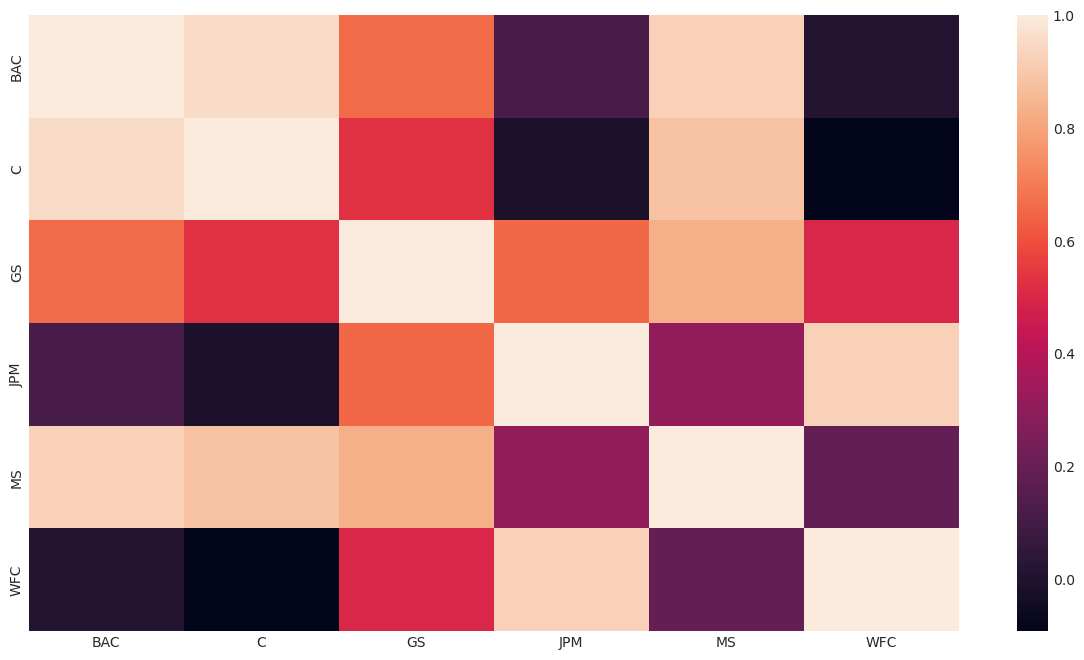

In [96]:
sns.heatmap(Closing.corr())

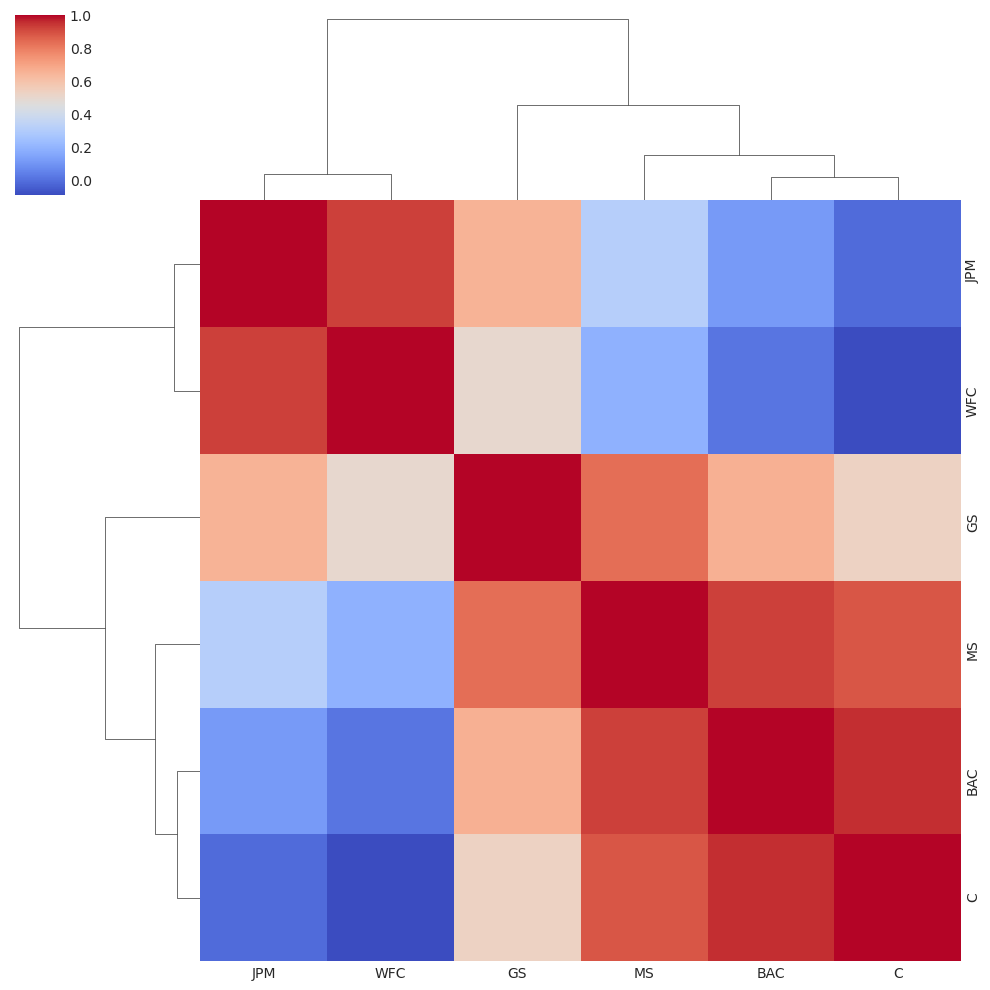

In [98]:
sns.clustermap(Closing.corr(), cmap="coolwarm")

#plt.show()

## Part 2- Optional

In [100]:
Bank_Information2015 = Bank_Information['2015-01-02':'2015-12-31']
Bank_Information2015

Bank Ticker     BAC                                          C                 \
Stock Info     open   high      low  close       volume   open   high     low   
date                                                                            
2015-01-02   17.990  18.03  17.6801  17.90   48951133.0  54.36  54.69  53.790   
2015-01-05   17.785  17.81  17.2900  17.38  105605485.0  53.91  53.96  52.330   
2015-01-06   17.420  17.44  16.7800  16.86  144912399.0  52.68  52.77  50.530   
2015-01-07   17.140  17.18  16.8700  16.94  104603795.0  51.51  51.55  50.615   
2015-01-08   17.160  17.34  17.1000  17.29   73388499.0  51.77  52.08  51.500   
...             ...    ...      ...    ...          ...    ...    ...     ...   
2015-12-24   17.320  17.38  17.2200  17.27   29373415.0  52.48  52.97  52.450   
2015-12-28   17.220  17.23  16.9800  17.13   41777497.0  52.57  52.57  51.960   
2015-12-29   17.250  17.35  17.1600  17.28   45670376.0  52.76  53.22  52.740   
2015-12-30   17.200  17.24  17.0400  17.05   35066378.0  52.84  52.94  52.250   
2015-12-31   17.010  17.07  16.8300  16.83   47152968.0  52.07  52.39  51.750   

Bank Ticker                     ...     MS                          \
Stock Info   close      volume  ...   open     high     low  close   
date                            ...                                  
2015-01-02   54.26  11139757.0  ...  39.05  39.1500  38.250  38.71   
2015-01-05   52.55  20945436.0  ...  38.46  38.5900  37.175  37.50   
2015-01-06   50.70  31989329.0  ...  37.47  37.5400  36.060  36.42   
2015-01-07   51.17  27890770.0  ...  36.93  37.0500  36.600  36.94   
2015-01-08   51.94  17470338.0  ...  37.29  37.7600  37.290  37.49   
...            ...         ...  ...    ...      ...     ...    ...   
2015-12-24   52.71   4671254.0  ...  32.57  32.7100  32.440  32.48   
2015-12-28   52.38   8761743.0  ...  32.36  32.3600  31.950  32.17   
2015-12-29   52.98  10155134.0  ...  32.44  32.7016  32.325  32.55   
2015-12-30   52.30   8763337.0  ...  32.50  32.6450  32.200  32.23   
2015-12-31   51.75  11281771.0  ...  31.91  32.3000  31.770  31.81   

Bank Ticker                WFC                                       
Stock Info       volume   open     high      low  close      volume  
date                                                                 
2015-01-02    7333790.0  55.11  55.1900  54.1935  54.70  11700856.0  
2015-01-05   12507930.0  54.14  54.3600  53.1000  53.20  15000528.0  
2015-01-06   16507812.0  53.35  53.4700  51.8500  52.09  20211187.0  
2015-01-07    9957727.0  52.63  52.6400  52.1100  52.40  15714655.0  
2015-01-08    8079561.0  53.00  53.5850  52.9600  53.56  16721579.0  
...                 ...    ...      ...      ...    ...         ...  
2015-12-24    2798163.0  54.97  55.0900  54.7100  54.82   4999417.0  
2015-12-28    5420280.0  54.55  54.7800  54.1700  54.68   8288841.0  
2015-12-29    6388244.0  55.11  55.3500  54.9900  55.29   7894876.0  
2015-12-30    5057162.0  55.27  55.3100  54.7940  54.89   8016893.0  
2015-12-31    8154307.0  54.51  54.9499  54.2200  54.36  10929767.0  

[252 rows x 30 columns]

In [102]:
Bank_Information2015["BAC"]

Stock Info,open,high,low,close,volume
date,,,,,
2015-01-02,17.990,18.03,17.6801,17.90,48951133.0
2015-01-05,17.785,17.81,17.2900,17.38,105605485.0
2015-01-06,17.420,17.44,16.7800,16.86,144912399.0
2015-01-07,17.140,17.18,16.8700,16.94,104603795.0
2015-01-08,17.160,17.34,17.1000,17.29,73388499.0
...,...,...,...,...,...
2015-12-24,17.320,17.38,17.2200,17.27,29373415.0
2015-12-28,17.220,17.23,16.9800,17.13,41777497.0
2015-12-29,17.250,17.35,17.1600,17.28,45670376.0


In [103]:
Bank_Information2015index = Bank_Information2015.index
Bank_Information2015list = Bank_Information2015index.tolist()
Bank_Information2015list

['2015-01-02',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-12',
 '2015-01-13',
 '2015-01-14',
 '2015-01-15',
 '2015-01-16',
 '2015-01-20',
 '2015-01-21',
 '2015-01-22',
 '2015-01-23',
 '2015-01-26',
 '2015-01-27',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-02-02',
 '2015-02-03',
 '2015-02-04',
 '2015-02-05',
 '2015-02-06',
 '2015-02-09',
 '2015-02-10',
 '2015-02-11',
 '2015-02-12',
 '2015-02-13',
 '2015-02-17',
 '2015-02-18',
 '2015-02-19',
 '2015-02-20',
 '2015-02-23',
 '2015-02-24',
 '2015-02-25',
 '2015-02-26',
 '2015-02-27',
 '2015-03-02',
 '2015-03-03',
 '2015-03-04',
 '2015-03-05',
 '2015-03-06',
 '2015-03-09',
 '2015-03-10',
 '2015-03-11',
 '2015-03-12',
 '2015-03-13',
 '2015-03-16',
 '2015-03-17',
 '2015-03-18',
 '2015-03-19',
 '2015-03-20',
 '2015-03-23',
 '2015-03-24',
 '2015-03-25',
 '2015-03-26',
 '2015-03-27',
 '2015-03-30',
 '2015-03-31',
 '2015-04-01',
 '2015-04-02',
 '2015-04-06',
 '2015-04-07',
 '2015-04-08',
 '2015-04-

In [106]:
# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=Bank_Information2015list,
                open=Bank_Information2015["BAC"]['open'],
                high=Bank_Information2015["BAC"]['high'],
                low=Bank_Information2015["BAC"]['low'],
                close=Bank_Information2015["BAC"]['close'])])

# Customize the chart layout
fig.update_layout(
    title='BAC Information For 2015',
    xaxis_title='Date',
    yaxis_title='Price',
)

# Show the chart
fig.show()

In [108]:
Bank_Information2015["JPM"]

Stock Info,open,high,low,close,volume
date,,,,,
2015-01-02,62.62,62.9600,62.070,62.49,12599991
2015-01-05,62.06,62.2800,60.230,60.55,20100577
2015-01-06,60.64,60.7500,58.350,58.98,29074111
2015-01-07,59.89,59.8900,58.665,59.07,23843244
2015-01-08,59.97,60.9000,59.970,60.39,16971056
...,...,...,...,...,...
2015-12-24,66.62,66.8900,66.320,66.60,4468242
2015-12-28,66.29,66.4500,65.710,66.38,6610609
2015-12-29,66.84,67.3000,66.740,67.07,9820830


In [112]:
Bank_Information2015["JPM"].ta.sma(length=10, append=True)

# Plot the SMA using .ta_plot(study='sma')
Bank_Information2015["JPM"].ta_plot(study='sma', title='Simple Moving Average (SMA) for Bank Information JPM 2015')

## Conclusion

#### This project was fun to do, and a bit difficult at the same time! I liked the idea of having to actually clean the data, but there also some potential to create the predictions about the future (which I will do with a later project!)

### ~Saving theses codes for a bigger personal project

### Currency Conversion

In [ ]:
#f = web.DataReader(["USD/JPY", "BTC/CNY"], "av-forex",api_key=os.getenv('5EZPVF4VSOUON8Q2'))
#f

### Sector Performance

In [ ]:
#web.get_sector_performance_av().head()

### Alpha Vantage Information

In [ ]:
# Alpha Vantage Key  - 5EZPVF4VSOUON8Q2